# Factor analysis
Хотим выделить значимые факторы, которые влияют на несколько наблюдаемых переменных.
Модель: $$\boldsymbol{\xi} = \mathbb{F}\boldsymbol{\eta} + \boldsymbol{\varepsilon},$$ исходных признаков $p$ штук, факторов $r$ штук, $\mathrm{cov} \boldsymbol\eta = \mathbb I_{p\times p}$, $\mathrm{E}\boldsymbol\varepsilon = 0$, $\mathrm{cov} \boldsymbol\varepsilon = \mathrm{diag} \left( \sigma_1^2,\cdots,\sigma_p^2 \right)$. Данные центрированы и нормированы. В терминах выборки: $$\mathbb{X} = \mathbb{V} \mathbb{F}^\mathsf T + noise$$

Данные: `state.x77` (встроенный набор данных).

In [21]:
data <- state.x77
head(data)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615.00,3624.00,2.10,69.05,15.10,41.30,20.00,50708.00
Alaska,365.00,6315.00,1.50,69.31,11.30,66.70,152.00,566432.00
Arizona,2212.00,4530.00,1.80,70.55,7.80,58.10,15.00,113417.00
Arkansas,2110.00,3378.00,1.90,70.66,10.10,39.90,65.00,51945.00
California,21198.00,5114.00,1.10,71.71,10.30,62.60,20.00,156361.00
Colorado,2541.00,4884.00,0.70,72.06,6.80,63.90,166.00,103766.00


Центрирование и нормирование данных включается в факторный анализ, по крайней мере, так написано в справке: "it is also common to scale the observed variables to unit variance, and done in this function".

In [2]:
fa <- factanal(data, factors = 4, scores = "regression", rotation = "varimax")

In [3]:
print(fa)


Call:
factanal(x = data, factors = 4, scores = "regression", rotation = "varimax")

Uniquenesses:
Population     Income Illiteracy   Life Exp     Murder    HS Grad      Frost 
     0.584      0.473      0.005      0.165      0.050      0.219      0.301 
      Area 
     0.327 

Loadings:
           Factor1 Factor2 Factor3 Factor4
Population                          0.636 
Income      0.313   0.281   0.561   0.189 
Illiteracy -0.466  -0.878                 
Life Exp    0.891   0.191                 
Murder     -0.792  -0.384   0.109   0.405 
HS Grad     0.517   0.418   0.581         
Frost       0.128   0.679   0.105  -0.460 
Area       -0.174           0.796         

               Factor1 Factor2 Factor3 Factor4
SS loadings      2.054   1.680   1.321   0.821
Proportion Var   0.257   0.210   0.165   0.103
Cumulative Var   0.257   0.467   0.632   0.734

Test of the hypothesis that 4 factors are sufficient.
The chi square statistic is 6.11 on 2 degrees of freedom.
The p-value is 0.047 

`Uniquenesses` -- часть дисперсии признака, которая не объяснена общими факторами ([the variability of a variable minus its communality](https://en.wikipedia.org/wiki/Factor_analysis#Terminology)), оцененное значение $\sigma_i^2$ для каждого признака $i\in 1\mathbin : p$.

`Loadings` -- матрица факторных нагрузок, коэффициенты, с которыми соответствующие исходные признаки входят в факторы. Здесь уже видно, что при обычном вращении (`varimax`) первый фактор получается генеральным, что не очень хорошо (фактор практически не интерпретируем).

`SS loadings` -- размеры соответствующих фактору собственных значений, по факту -- дисперсия фактора, `Proportion Var` -- доля объяснённой дисперсии, `Cumulative Var` -- суммарная доля объяснённой дисперсии (объяснённая всеми факторами до этого включительно).

`Test of the hypothesis that 4 factors are sufficient` -- проверяем гипотезу о том, что четырёх факторов достаточно, то есть, что для полученных $\mathbb F$ и $\Psi$ $\Sigma = \mathbb F \mathbb F^\mathsf T + \Psi$. $p$-value маленький, но и данные под модель не особенно подходят: различные города не являются полностью независимыми.

Можно посмотреть на данные в координатах заданных факторов -- эта интерпретация будет нагляднее численной.

In [5]:
biplot.factanal <- function (fa.fit, choices = 1:2, ...) {
    if (length(choices) != 2) stop("Choices should be a vector of length 2")
    x = fa.fit$scores[,choices]
    y = fa.fit$loadings[,choices]
    biplot(x,y,...)
}

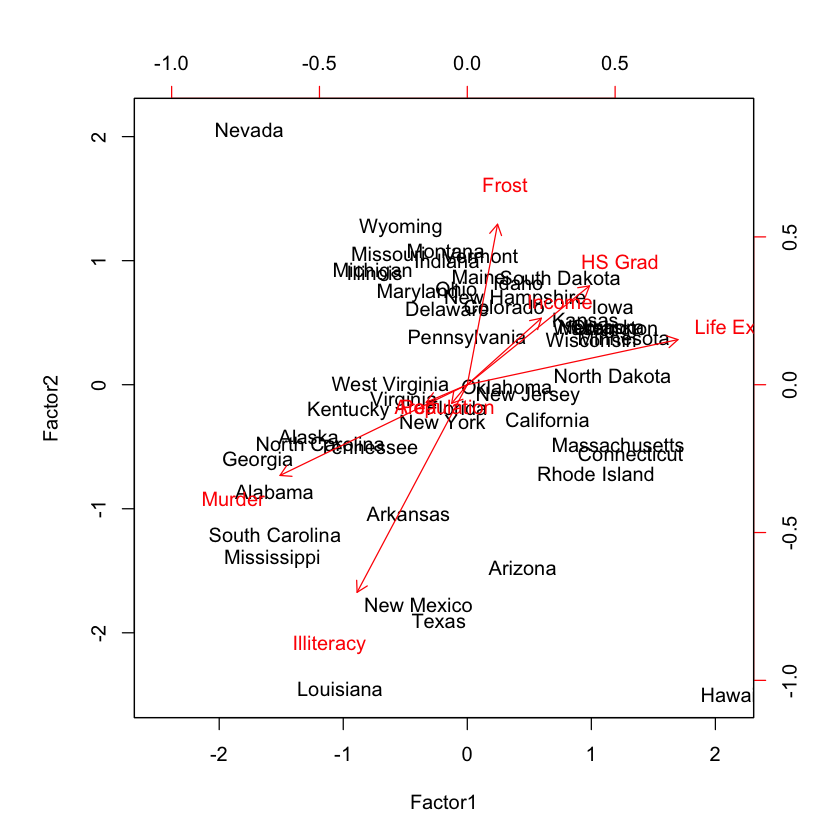

In [6]:
biplot.factanal(fa)

Первый фактор представляет собой в основном разницу между `HS Grad` и `Life Expectancy` с одной стороны и `Illiteracy` и `Murder` -- с другой, то есть некий индекс культурного уровня в штате. Второй фактор -- разница между теми же `Illiteracy` и `Murder` (но уже с другим соотношением весов) и суммой климата, высшего образования и дохода.

Если мы говорим, что очищенные от шума наблюдения $\tilde{\boldsymbol{\xi}}$ могут быть представлены как $\mathbb{F}\boldsymbol{\eta}$, то $\forall\; \mathbb{W} \in M_r\left(\mathbb R\right)$ верно, что $\tilde{\boldsymbol{\xi}}$ может быть представлена и как $\mathbb{F}\mathbb{W}^{-1}\mathbb{W}\boldsymbol{\eta} = \mathbb{F}'\boldsymbol{\eta}'$. То есть, имея матрицу факторных нагрузок $\mathbb{F}$, мы можем получить из неё любую другую (возможно, лучше интерпретируемую) матрицу факторных нагрузок $\mathbb{F}'$, для которой будут выполняться все те же свойства, что и для $\mathbb{F}$.

На выборочном языке: $\mathbb{X} \in M_{n, p}\left(\mathbb R\right)$ -- матрица наблюдений (1 наблюдение -- 1 строка), $\mathbb{F} \in M_{p, r}\left(\mathbb R\right)$ -- матрица факторных нагрузок, $\mathbb{V} \in M_{n, r}\left(\mathbb R\right)$ -- матрица факторных значений, $$\mathbb{X} = \mathbb{V}\mathbb{F}^\mathsf T + \boldsymbol{\varepsilon}$$

Вращение: $\forall\;\mathbb{W}$ -- обратимой матрицы в $\mathbb{R}^{r\times r}$ -- 
$$\mathbb{X} = \mathbb{V}\mathbb{W}^{-1}\mathbb{W}\mathbb{F}^\mathsf T = \tilde{\mathbb{V}}\tilde{\mathbb{F}}^\mathsf T.$$ 
Здесь $\tilde{\mathbb{V}} = \mathbb{V}\mathbb{W}^{-1}$, $\tilde{\mathbb{F}} = \mathbb{F}\mathbb{W}^\mathsf T$.

Что такое корреляции факторных значений друг с другом? Это матрица корреляций столбцов (факторов) матрицы $\mathbb{V}$ (или $\tilde{\mathbb{V}}$, смотря что нас интересует), т.е. $\mathbb{V}^\mathsf T\mathbb{V}$.
$$\mathrm{cor}\tilde{\mathbb{V}} = \tilde{\mathbb{V}}^\mathsf T\tilde{\mathbb{V}} = \left(\mathbb{W}^{-1}\right)^\mathsf T\mathbb{V}^\mathsf T\mathbb{V}\mathbb{W}^{-1} = \left(\mathbb{W}^{-1}\right)^\mathsf T\mathbb{W}^{-1},$$
так как исходные факторы $\mathbb{V}$ ортогональны, и $\mathbb{V}^\mathsf T\mathbb{V} = 1$.

Определим функцию, считающую корреляции (повёрнутых) факторов:

In [7]:
fa.scores.cov <- function(rotmat) {
    inverted.rotation <- solve(rotmat)
    return(t(inverted.rotation) %*% inverted.rotation)
}

Посмотрим, что это выполняется для стандартного ортогонального вращения varimax.

В `fa$scores` содержатся уже повёрнутые факторные значения:

In [9]:
fa.scores.cov(fa$rotmat)

1.000000e+00,2.567391e-16,2.220446e-16,-8.326673e-17
2.567391e-16,1.000000e+00,-4.163336e-17,1.665335e-16
2.220446e-16,-4.163336e-17,1.000000e+00,1.387779e-16
-8.326673e-17,1.665335e-16,1.387779e-16,1.000000e+00


В `fa$rotmat` содержится матрица вращения $\mathbb{W}$. Убедимся, что это матрица вращения (что $\mathbb{W}^\mathsf T\mathbb{W} = 1$):

In [10]:
all.equal(diag(NROW(fa$rotmat)), 
          fa$rotmat %*% t(fa$rotmat))

[1] TRUE

Посмотрим теперь на различные методы вращения.

In [11]:
library(GPArotation)
rotation.methods <- c('varimax', 'quartimax', 'promax', 'oblimin')
fa.rotations = lapply(rotation.methods, 
                      function(r) factanal(data, factors = 4, scores = "regression", rotation = r))

In [25]:
compare.factor.scores.cor <- function (fa.fit) {
    return(sqrt(sum((fa.scores.cov(fa.fit$rotmat) - diag(NROW(fa$rotmat)))^2)))
}

`compare.factor.scores.cor` сравнивает ковариационную матрицу модели ($\mathrm{cov}\boldsymbol\eta$), полученной с помощью факторного анализа, с идеальной (единичной) ковариационной матрицей, считая норму Фробениуса для разности между ковариационной матрицей модели и единичной матрицей ($\sqrt{\sum_{i=1}^r\sum_{j=1}^r\left\vert\left(\mathrm{cov}\eta\right)_{ij} - \delta_{ij}\right\vert^2}$).

Построим график таких разностей для разных типов вращения.

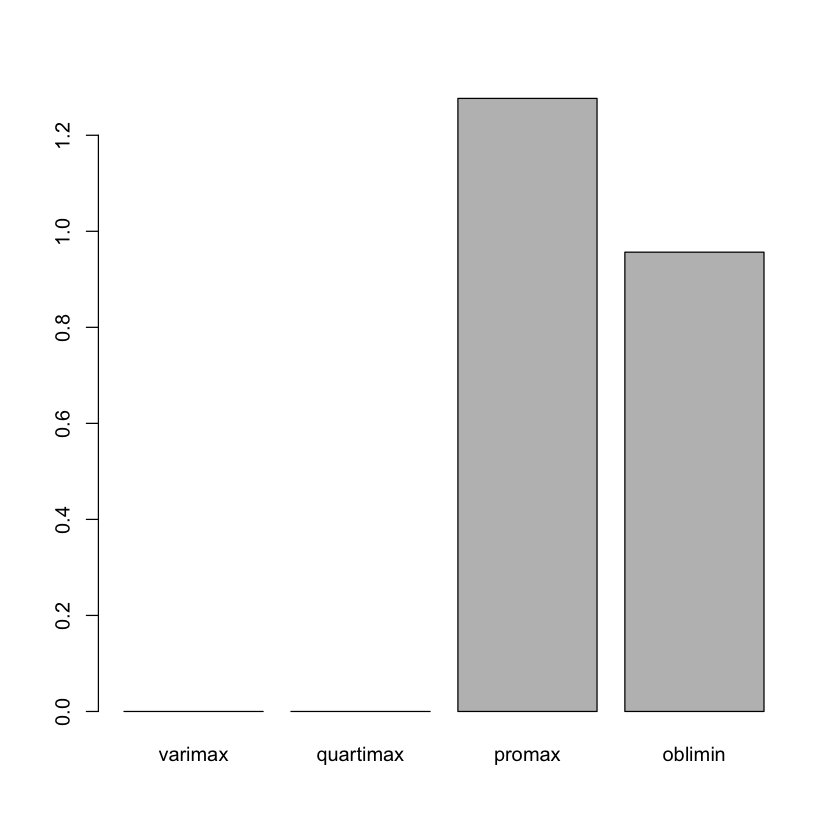

In [27]:
cor.diff <- sapply(fa.rotations, compare.factor.scores.cor)
names(cor.diff) <- rotation.methods
barplot(cor.diff)

Ожидаемо, что корреляционные матрицы ортогональных вращений (`varimax`, `quartimax`) диагональны, а вот по тому, насколько недиагональны корреляционные матрицы косоугольных вращений, можно судить о "степени доверия" к этому вращению.

Посмотрим на интерпретацию факторов, полученных при косоугольном вращении.

In [34]:
fa.promax <- fa.rotations[[3]]  # 'promax' method
print(loadings(fa.promax), cutoff = 0.25)


Loadings:
           Factor1 Factor2 Factor3 Factor4
Population                          0.676 
Income                      0.474         
Illiteracy          1.023                 
Life Exp    0.994                         
Murder     -0.838                   0.364 
HS Grad     0.359  -0.253   0.497         
Frost              -0.731          -0.428 
Area                        0.932         

               Factor1 Factor2 Factor3 Factor4
SS loadings      1.938   1.782   1.407   0.844
Proportion Var   0.242   0.223   0.176   0.105
Cumulative Var   0.242   0.465   0.641   0.746


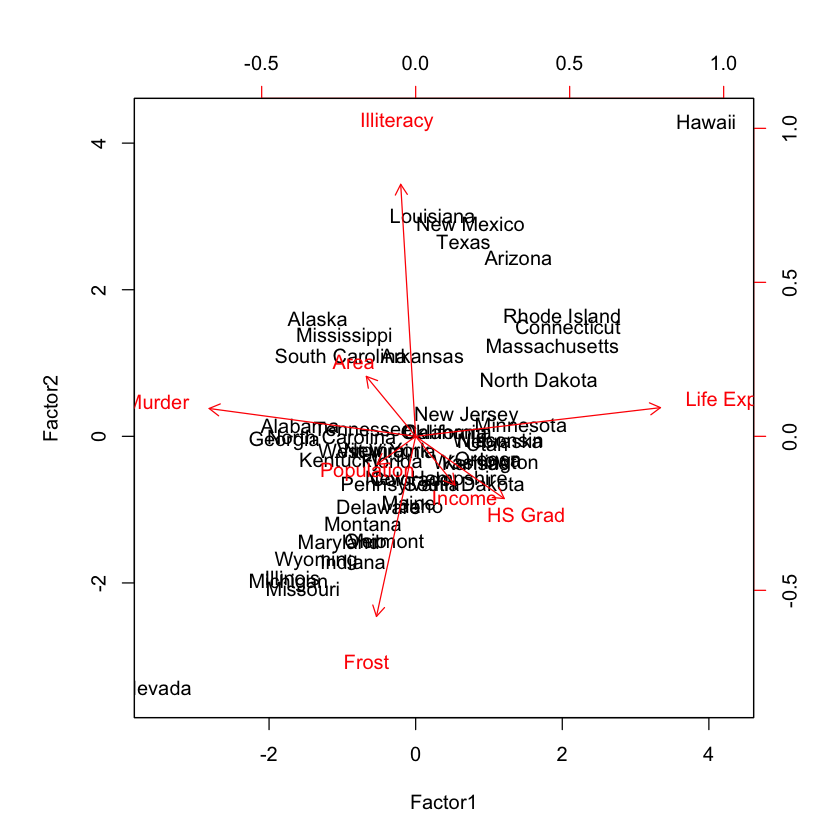

In [35]:
biplot.factanal(fa.promax)

Здесь гораздо чётче разделились первый фактор -- разница между количеством убийств и продолжительностью жизни, своеобразный "индекс жизни населения", и второй -- разница между неграмотностью и холодом. Предположительное объяснение существования этого фактора: невозможность проводить много времени в движении (будучи ограниченными пространством отапливаемого помещения) способствует повышению уровня грамотости, так как населению больше нечем заниматься. Другой вариант: в условиях сурового климата бездомные, составляющие большую часть неграмотного населения, быстро вымирают.

In [32]:
fa.oblimin <- fa.rotations[[4]]  # 'oblimin' method
print(loadings(fa.promax), cutoff = 0.25)


Loadings:
           Factor1 Factor2 Factor3 Factor4
Population                          0.676 
Income                      0.474         
Illiteracy          1.023                 
Life Exp    0.994                         
Murder     -0.838                   0.364 
HS Grad     0.359  -0.253   0.497         
Frost              -0.731          -0.428 
Area                        0.932         

               Factor1 Factor2 Factor3 Factor4
SS loadings      1.938   1.782   1.407   0.844
Proportion Var   0.242   0.223   0.176   0.105
Cumulative Var   0.242   0.465   0.641   0.746


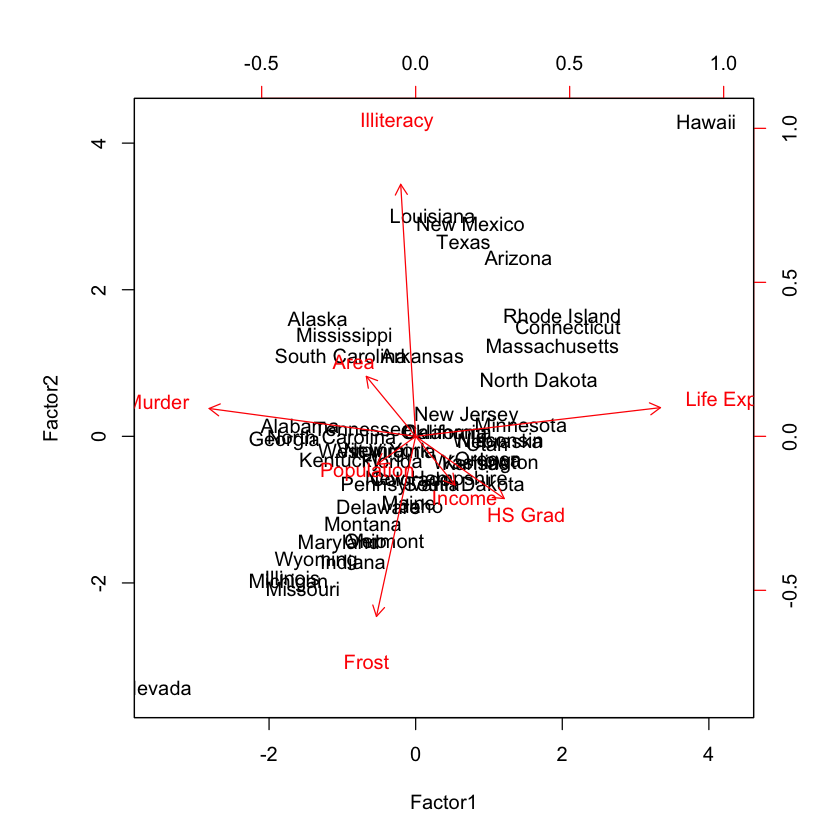

In [33]:
biplot.factanal(fa.promax)

При разных методах поиска оптимального вращения картина для первых двух признаков остаётся примерно одинаковой.